In [5]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import rosbag
import datetime

In [11]:
# D = rosbag.Bag('data/2022-09-28-22-25-51.bag')
D = rosbag.Bag('data/2022-12-08-21-40-53.bag')

In [12]:
E = pd.DataFrame([{ an: ap for an, ap in list(zip(a.name, a.position)) + [('topic', topic), ('dt', datetime.datetime.utcfromtimestamp(t.to_sec()))] } for topic, a, t in D.read_messages(topics=['/robot1/joint_command', '/robot1/joint_states'])])

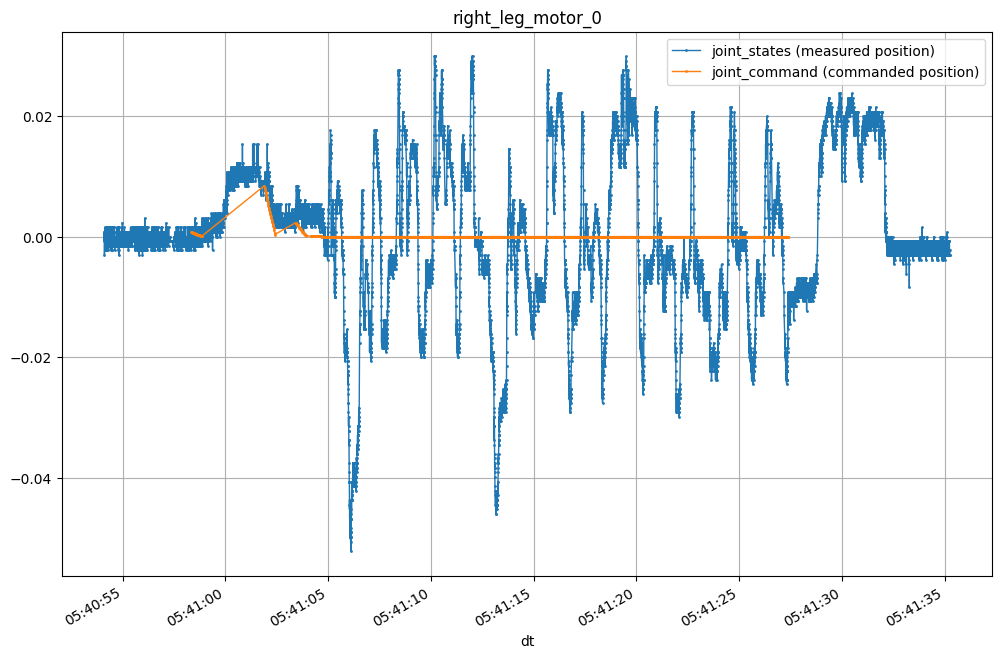

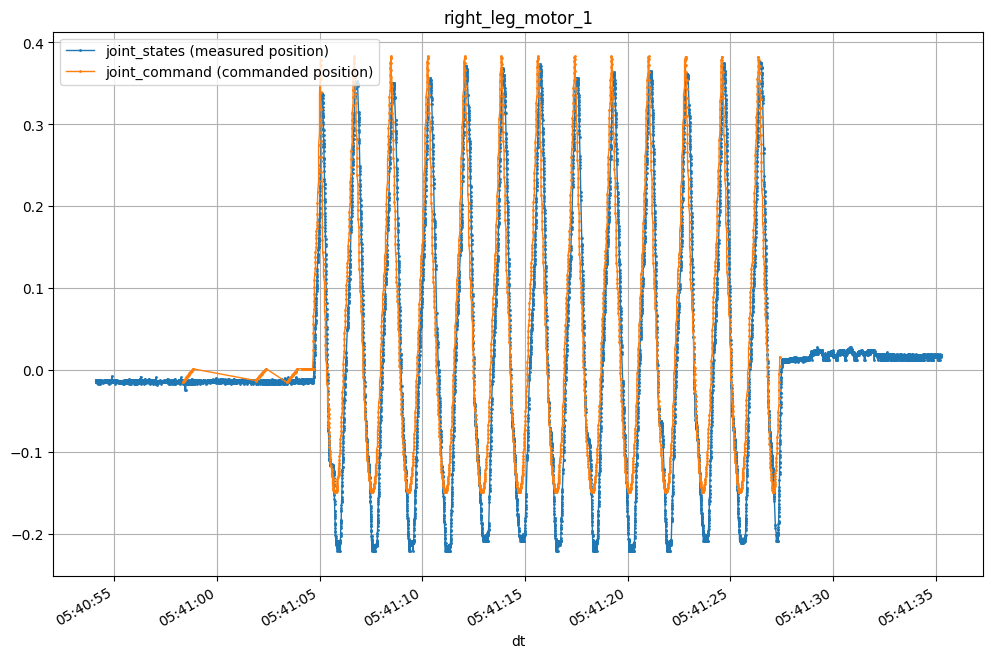

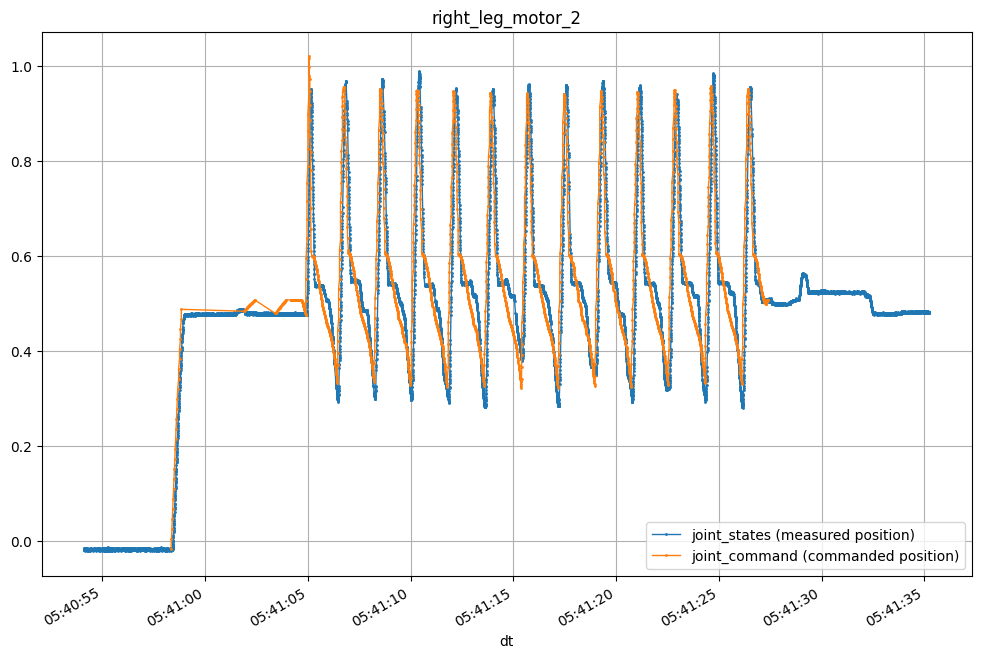

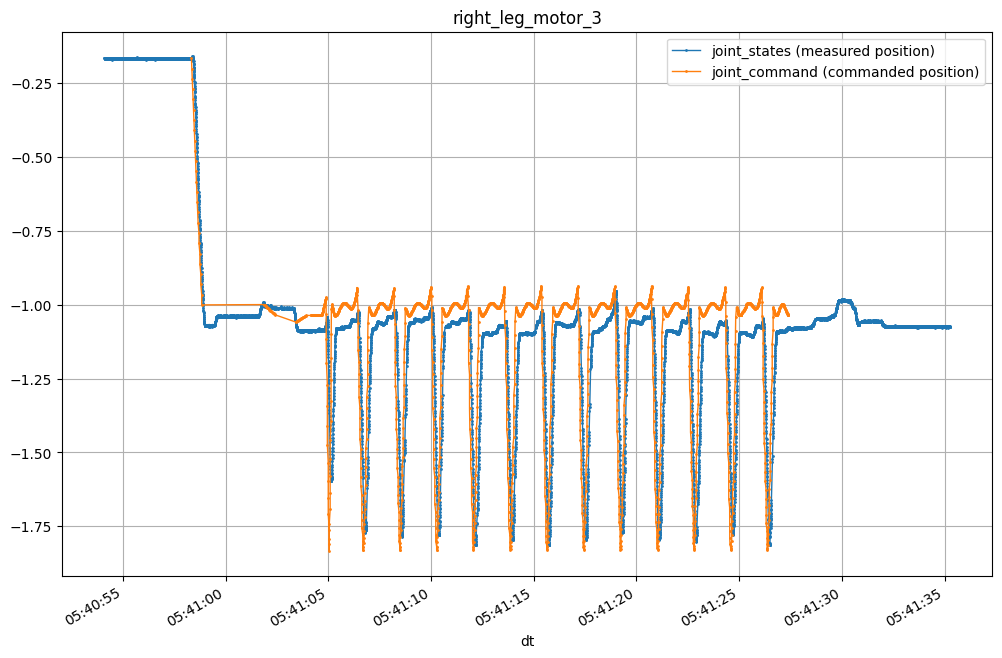

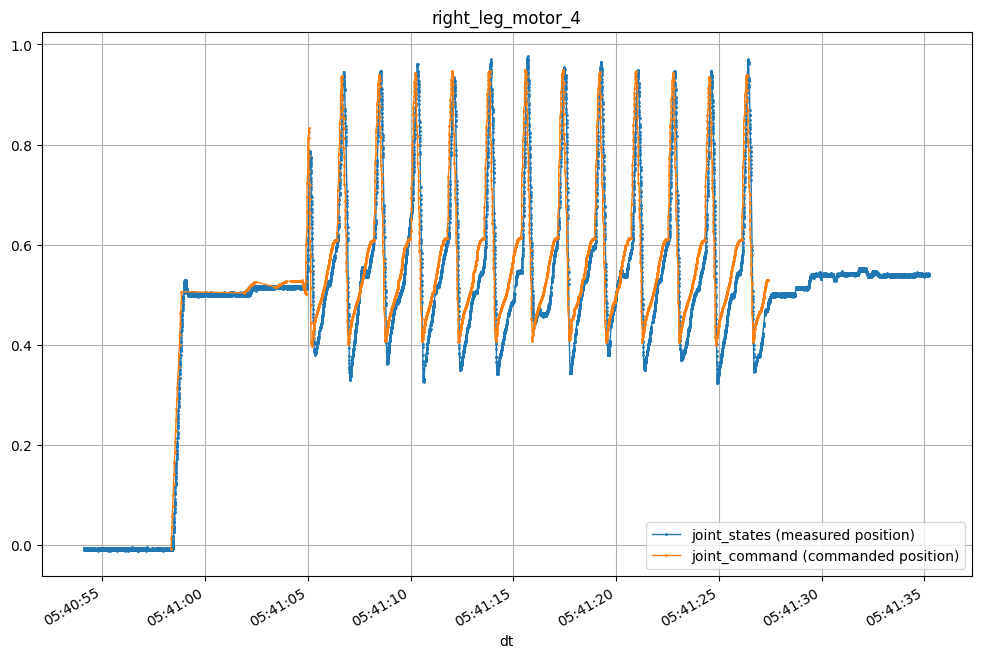

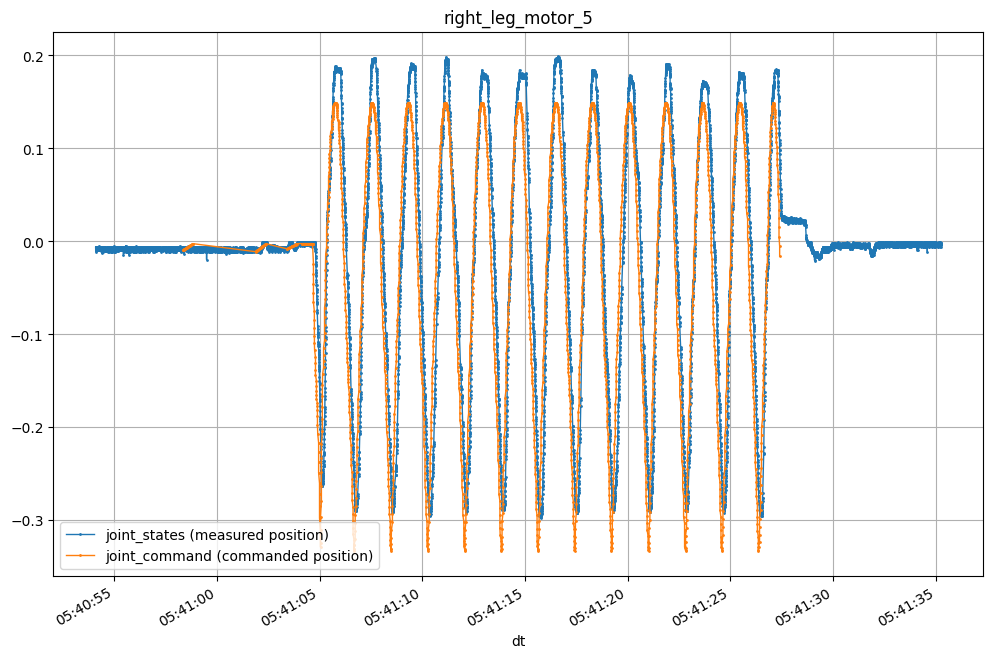

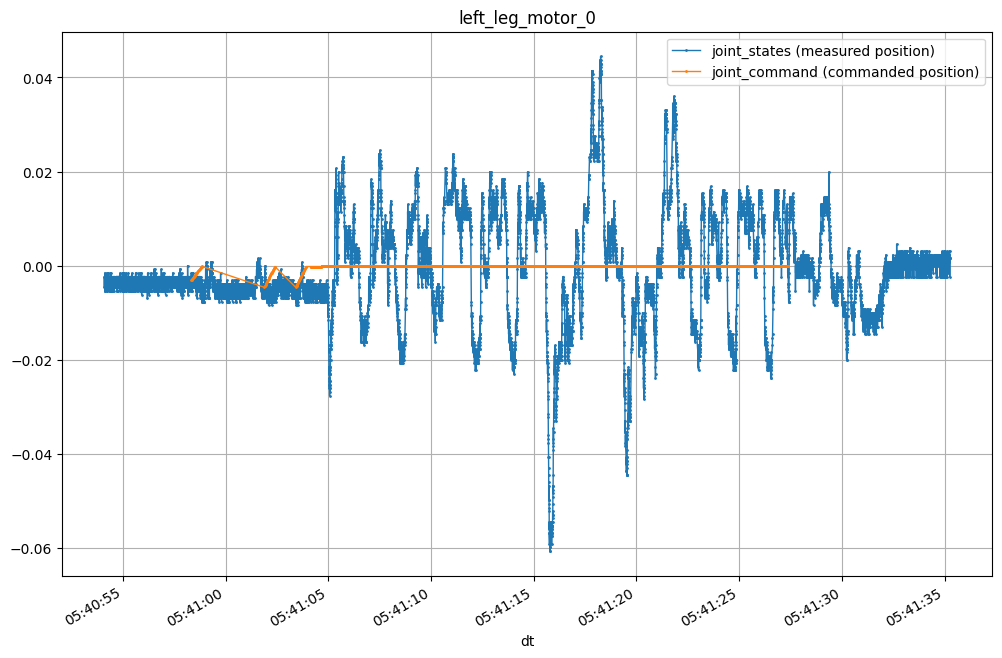

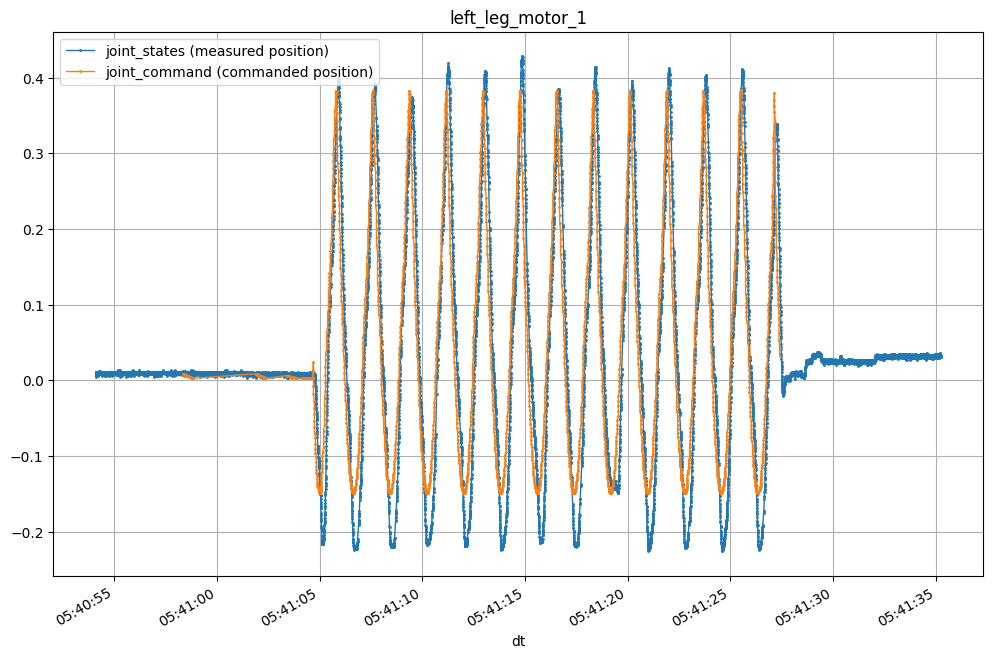

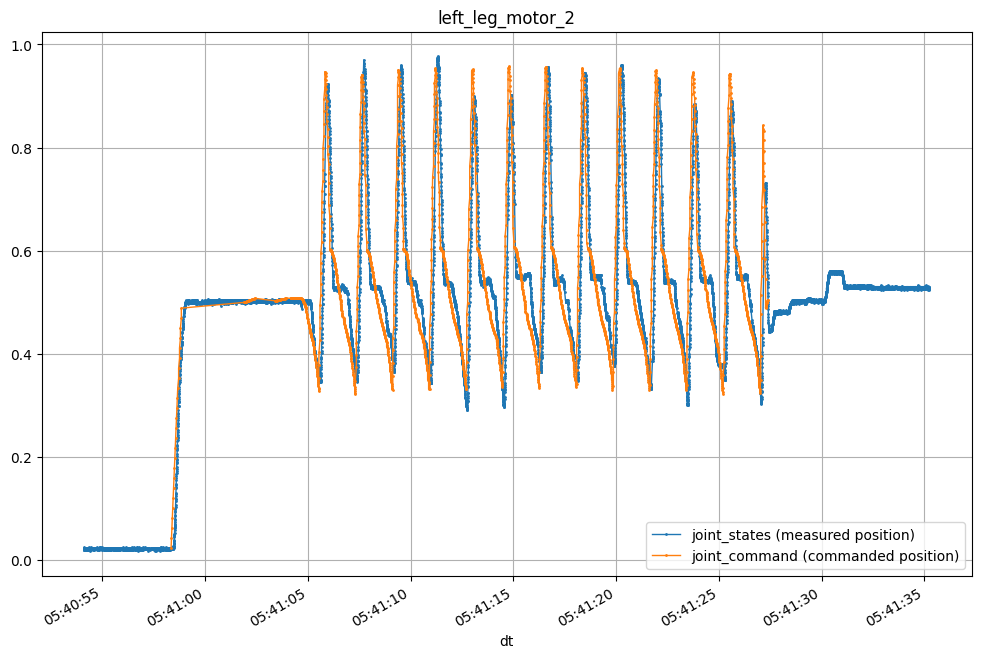

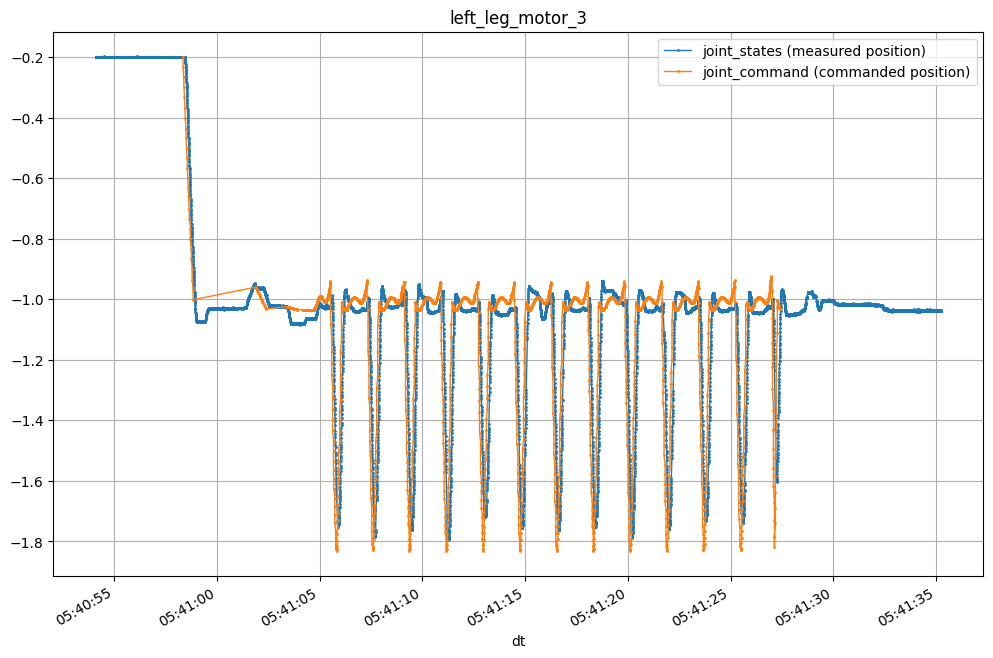

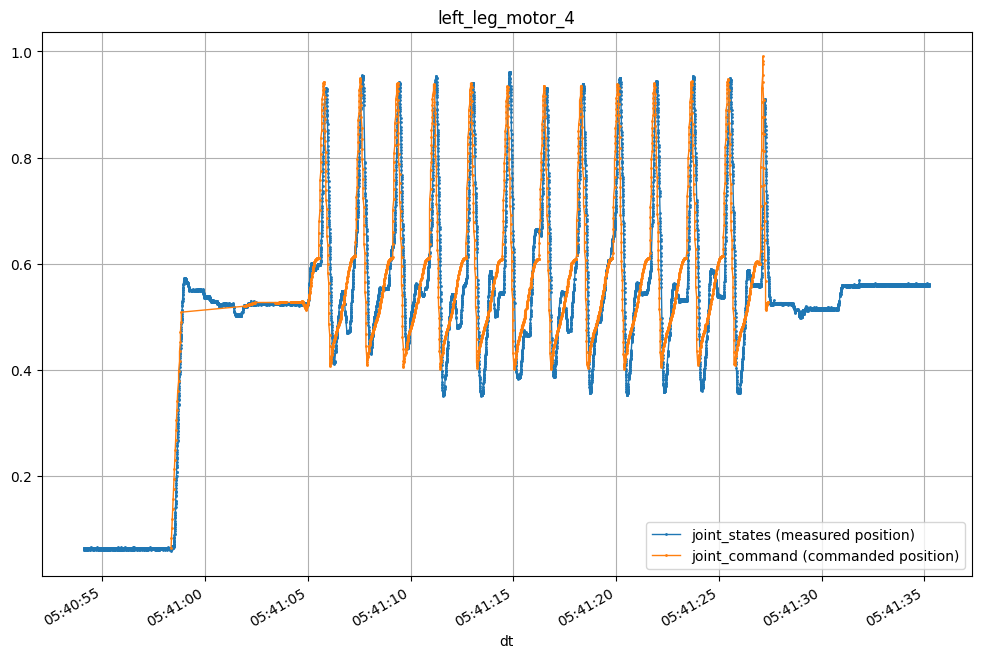

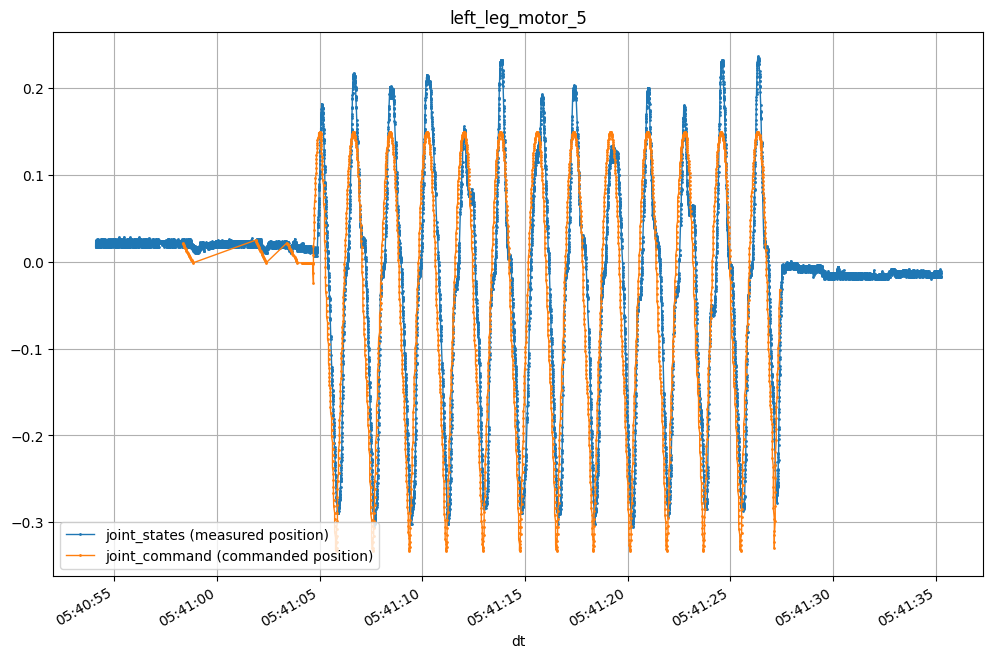

In [13]:
for c in E.columns[E.columns.str.contains('leg')]:
    plt.figure(figsize=(12,8))
    E[E['topic'].str.contains('states')].set_index('dt')[c].plot(linewidth=1, marker='o', markersize=1)
    E[E['topic'].str.contains('command')].set_index('dt')[c].plot(linewidth=1, marker='o', markersize=1)
    plt.grid(True, which='both')
    plt.legend(['joint_states (measured position)', 'joint_command (commanded position)'])
    plt.title(c)
    plt.savefig('figs/%s.png' % c)

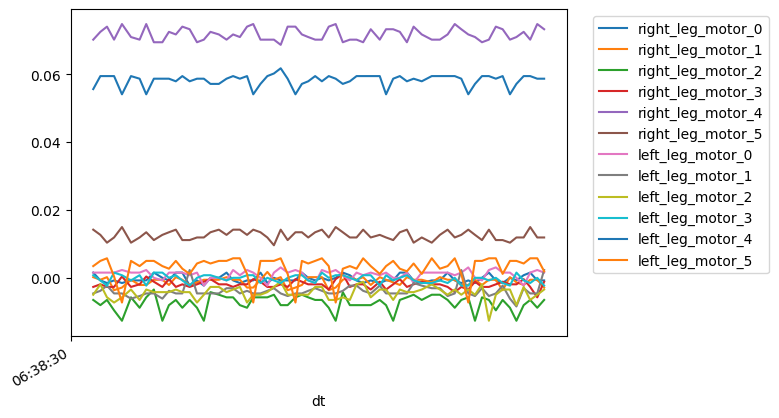

In [5]:
A = E[E['topic'].str.contains('states')].set_index('dt')
A.loc[:,A.columns.str.contains('leg')].iloc[:64].plot()
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")